In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../src/')

In [64]:
from data.create_dataset import *
from visualization.visualize import *
from modelling import ols,ridge
from model_evaluation.metrics import *
from processing.data_preprocessing import *
from utils.utils import *
import numpy as np
from sklearn.model_selection import  train_test_split

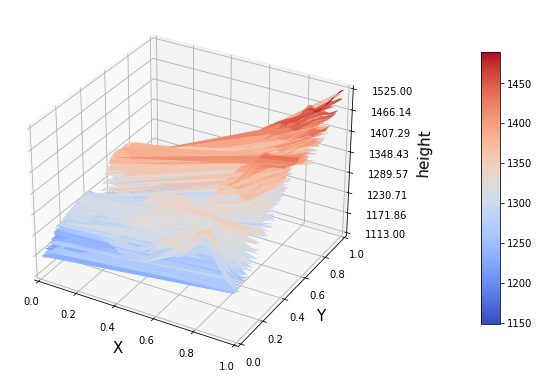

In [16]:
X, z = create_dataset('../data/raw/SRTM_data_Norway_1.tif',degree=10)
X_train, X_test, z_train, z_test = train_test_split(X,z, test_size=0.2)
lmb = 0.01
beta_ridge = ridge.fit_beta(X_train,z_train,lmb)
z_pred = ridge.predict(X_test,beta_ridge)
surf = plot_surf_from_X(X_train,z_train)

In [49]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import Ridge


z_ssScaler = StandardScaler()
z_mmScaler = MinMaxScaler()
X_ssScaler = StandardScaler()
X_mmScaler = MinMaxScaler()

In [53]:
X_train_scl = X_mmScaler.fit_transform(X_train)
X_test_scl = X_mmScaler.transform(X_test)

z_train_scl = z_mmScaler.fit_transform(z_train)
z_test_scl = z_mmScaler.transform(z_test)


In [55]:
beta_scl = ridge.fit_beta(X_train_scl, z_train_scl, lmb, fit_intercept=False)
rid = Ridge(alpha=lmb, fit_intercept=False).fit(X_train_scl, z_train_scl)
print(rid.intercept_)
np.column_stack((rid.coef_.T,beta_scl))

0.0


array([[ 0.        ,  0.        ],
       [ 2.2703388 ,  2.2703388 ],
       [ 1.88979791,  1.88979791],
       [-4.2974951 , -4.2974951 ],
       [-4.36594049, -4.36594049],
       [-4.89795347, -4.89795347],
       [ 2.19613393,  2.19613393],
       [ 4.58638056,  4.58638056],
       [-0.86434291, -0.86434291],
       [ 5.18142608,  5.18142608],
       [ 1.85759402,  1.85759402],
       [ 1.0373045 ,  1.0373045 ],
       [ 2.70683447,  2.70683447],
       [ 0.61618789,  0.61618789],
       [ 1.7102765 ,  1.7102765 ],
       [ 0.16084827,  0.16084828],
       [-1.89285541, -1.89285541],
       [ 1.85834954,  1.85834954],
       [-0.39763158, -0.39763158],
       [ 0.58603777,  0.58603777],
       [-2.47180029, -2.47180029],
       [-0.93775343, -0.93775343],
       [-2.24535406, -2.24535406],
       [ 1.32401115,  1.32401115],
       [-1.50136602, -1.50136602],
       [-1.62193247, -1.62193247],
       [ 1.04157924,  1.04157924],
       [-2.95997831, -2.95997831],
       [-1.15620834,

In [56]:
z_pred_scl = ridge.predict(X_test_scl,beta_scl)

z_pred_sk = rid.predict(X_test_scl)

np.column_stack((z_pred_sk,z_pred_scl))

array([[0.33254075, 0.33254075],
       [0.55794409, 0.55794409],
       [0.36425402, 0.36425402],
       ...,
       [0.15049379, 0.15049379],
       [0.84205311, 0.84205311],
       [0.4870248 , 0.4870248 ]])

Splitting a columnstack seem to work. I.e when concatenating and sorting we end up with the same surface. However, the sorting might fix things(if things are wrong)?

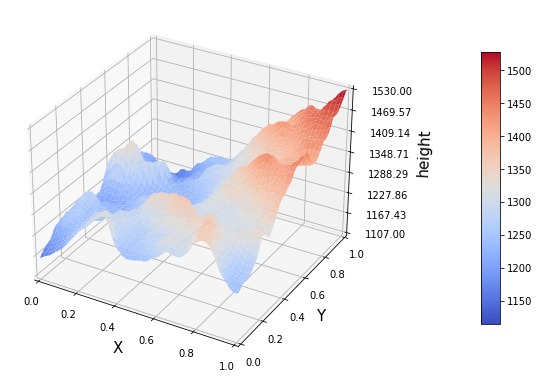

In [69]:
xy, z = create_dataset('../data/raw/SRTM_data_Norway_1.tif')
xy_train, xy_test, z_train, z_test = train_test_split(xy,z, test_size=0.2)
xy_ = np.concatenate((xy_train,xy_test),axis=0)
z_ = np.concatenate((z_train,z_test),axis=0)
xy_, z_ = sort_surface(xy_,z_)
surf = plot_surf(xy_[:,0],xy_[:,1],z_)

Lets test by splitting with columnstack and design matrix with same random state and compare. At least z_train is equal in both cases.

In [71]:
X = create_poly_design_matrix(xy[:,0],xy[:,1])

xy_train, xy_test, z_train, z_test = train_test_split(xy,z, test_size=0.2, random_state = 42)
X_train, X_test, z_train2, z_test2 = train_test_split(X,z, test_size=0.2, random_state = 42)
z_train - z_train2

Array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int16)

...and xy_train and X_train are equal. So yes, splitting columnstack do work.

In [74]:
X_train[:,1:3] - xy_train

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

Gonna make the MSE curves now with different degrees.

(10000, 2)


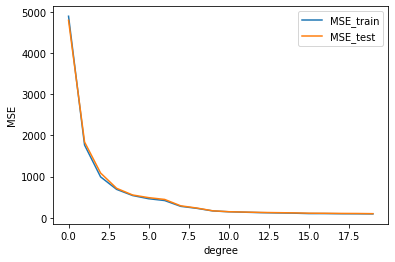

In [100]:
max_degree = 20
MSE_train = np.zeros(max_degree)
MSE_test = np.zeros(max_degree)
xy, z = create_dataset('../data/raw/SRTM_data_Norway_1.tif')
xy_train, xy_test, z_train, z_trest = train_test_split(xy,z,test_size=0.2, random_state = 42)
X = create_poly_design_matrix(xy)

for degree in range(max_degree):
    X_train = create_poly_design_matrix(xy_train,degree=degree)
    X_test = create_poly_design_matrix(xy_test,degree=degree)
    z_tilde,z_pred = ols.fit_predict(X_train,z_train, X_test)
    
    MSE_train[degree] = MSE(z_train,z_tilde)
    MSE_test[degree] = MSE(z_test,z_pred)



plt.figure()
plt.plot(MSE_train, label = 'MSE_train')
plt.plot(MSE_test, label = 'MSE_test')


plt.xlabel('degree')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [88]:
a = None
if(a!=None):
    print(1)